#                       SMDM Project Solutions Notebook
               by Ganesh H

In [92]:
import numpy as np
import pandas as pd
import scipy.stats as stat
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['axes.grid'] = True

sns.set_style("darkgrid")

# WholeSale Customer Analysis

In [93]:
whole = pd.read_csv(r'C:\Users\Ganesh Hari\Downloads\Wholesale+Customers+Data.csv')
whole.head()

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,1,Retail,Other,12669,9656,7561,214,2674,1338
1,2,Retail,Other,7057,9810,9568,1762,3293,1776
2,3,Retail,Other,6353,8808,7684,2405,3516,7844
3,4,Hotel,Other,13265,1196,4221,6404,507,1788
4,5,Retail,Other,22615,5410,7198,3915,1777,5185


In [94]:
whole.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Buyer/Spender     440 non-null    int64 
 1   Channel           440 non-null    object
 2   Region            440 non-null    object
 3   Fresh             440 non-null    int64 
 4   Milk              440 non-null    int64 
 5   Grocery           440 non-null    int64 
 6   Frozen            440 non-null    int64 
 7   Detergents_Paper  440 non-null    int64 
 8   Delicatessen      440 non-null    int64 
dtypes: int64(7), object(2)
memory usage: 31.1+ KB


## Q1.1

In [96]:
whole.describe()

,Buyer/Spender,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,220.500000,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,127.161315,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,110.750000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,220.500000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,330.250000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,440.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [97]:
reg = pd.DataFrame(whole.groupby('Region').sum().sum(axis=1),columns =['Total Spend'])
reg

,Total Spend
Region,
Lisbon,2404908
Oporto,1569987
Other,10741625


In [98]:
chanl = pd.DataFrame(whole.groupby('Channel').sum().sum(axis=1),columns =['Total Spend'])
chanl

,Total Spend
Channel,
Hotel,8070603
Retail,6645917


<AxesSubplot:title={'center':'Total Spend Based on region'}, xlabel='Region', ylabel='Total Spend'>

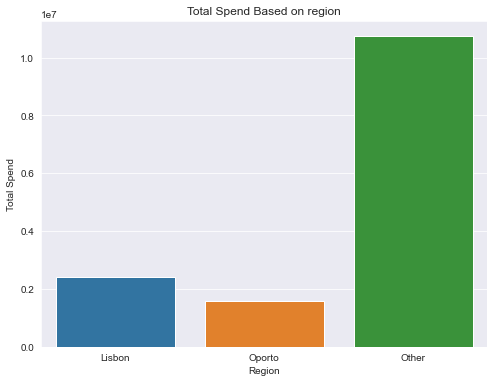

In [99]:
plt.figure(figsize=(8,6))
plt.title('Total Spend Based on region')
sns.barplot(data = reg,x=reg.index,y='Total Spend')

<AxesSubplot:title={'center':'Total Spend Based on Channel'}, xlabel='Channel', ylabel='Total Spend'>

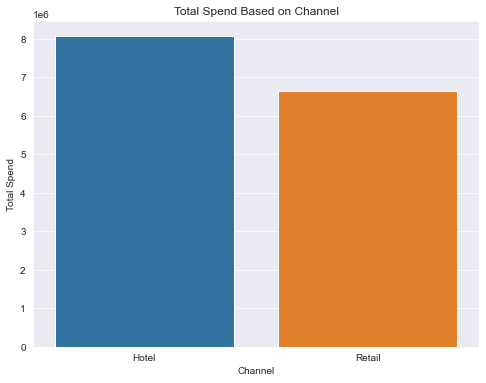

In [100]:
plt.figure(figsize=(8,6))
plt.title('Total Spend Based on Channel')
sns.barplot(data = chanl,x=chanl.index,y='Total Spend')

## Q1.2

In [101]:
pd.pivot_table(whole,index=['Region'])

,Buyer/Spender,Delicatessen,Detergents_Paper,Fresh,Frozen,Grocery,Milk
Region,,,,,,,
Lisbon,235.000000,1354.896104,2651.116883,11101.727273,3000.337662,7403.077922,5486.415584
Oporto,317.000000,1159.702128,3687.468085,9887.680851,4045.361702,9218.595745,5088.170213
Other,202.613924,1620.601266,2817.753165,12533.471519,2944.594937,7896.363924,5977.085443


In [102]:
pd.pivot_table(whole,index='Channel')

,Buyer/Spender,Delicatessen,Detergents_Paper,Fresh,Frozen,Grocery,Milk
Channel,,,,,,,
Hotel,238.369128,1415.956376,790.560403,13475.560403,3748.251678,3962.137584,3451.724832
Retail,183.000000,1753.436620,7269.507042,8904.323944,1652.612676,16322.852113,10716.500000


In [103]:
pd.pivot_table(whole,index=['Region','Channel'])

Buyer/Spender  Delicatessen  Detergents_Paper         Fresh  \
Region Channel                                                                
Lisbon Hotel       237.728814   1197.152542        950.525424  12902.254237   
       Retail      226.055556   1871.944444       8225.277778   5200.000000   
Oporto Hotel       321.000000   1105.892857        482.714286  11650.535714   
       Retail      311.105263   1239.000000       8410.263158   7289.789474   
Other  Hotel       227.582938   1518.284360        786.682464  13878.052133   
       Retail      152.438095   1826.209524       6899.238095   9831.504762   

                     Frozen       Grocery          Milk  
Region Channel                                           
Lisbon Hotel    3127.322034   4026.135593   3870.203390  
       Retail   2584.111111  18471.944444  10784.000000  
Oporto Hotel    5745.035714   4395.500000   2304.250000  
       Retail   1540.578947  16326.315789   9190.789474  
Other  Hotel    3656.900474   3886.734597   3486.981043  
       Retail   1513.200000  15953.809524  10981.009524

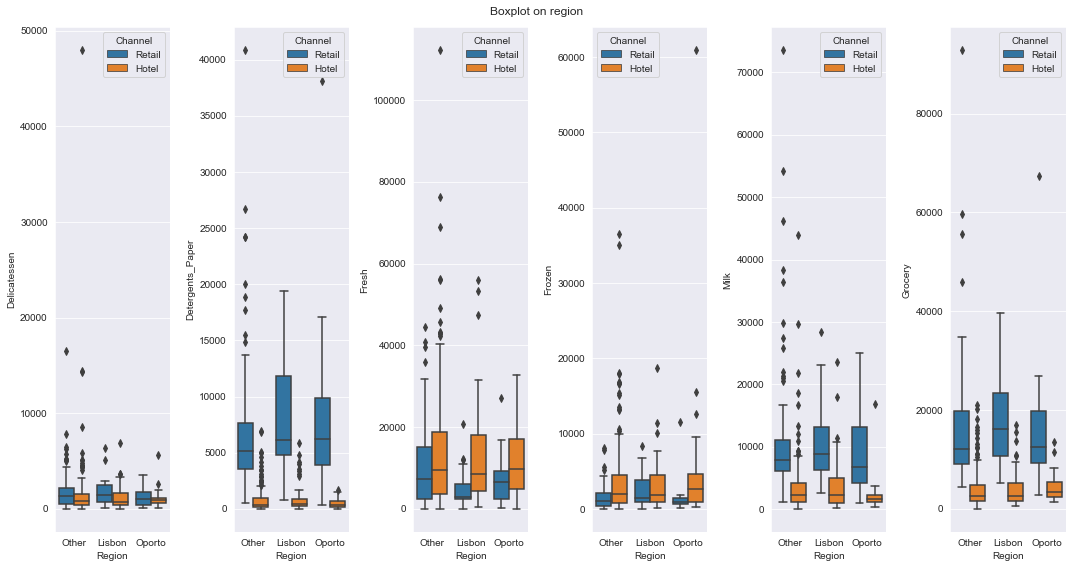

In [104]:
plt.figure(figsize=(15,8))
plt.suptitle("Boxplot on region")
plt.subplot(1,6,1)
sns.boxplot(data =whole,x='Region',hue='Channel',y='Delicatessen')
plt.subplot(1,6,2)
sns.boxplot(data =whole,x='Region',hue='Channel',y='Detergents_Paper')
plt.subplot(1,6,3)
sns.boxplot(data =whole,x='Region',hue='Channel',y='Fresh')
plt.tight_layout()

plt.subplot(1,6,4)
sns.boxplot(data =whole,x='Region',hue='Channel',y='Frozen')
plt.subplot(1,6,5)
sns.boxplot(data =whole,x='Region',hue='Channel',y='Milk')
plt.subplot(1,6,6)
sns.boxplot(data =whole,x='Region',hue='Channel',y='Grocery')
plt.tight_layout()

## Q1.3

In [105]:
#1.3
temp_whole = whole.describe()
temp_whole.loc['Coefficient of Variance',:] = temp_whole.loc[('std'), :]/temp_whole.loc[('mean'), :]
temp_whole.iloc[[1,2,8],:]

,Buyer/Spender,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
mean,220.500000,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,127.161315,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
Coefficient of Variance,0.576695,1.053918,1.273299,1.195174,1.580332,1.654647,1.849407


## Q1.4

Text(0.5, 1.0, 'Boxplot of all items')

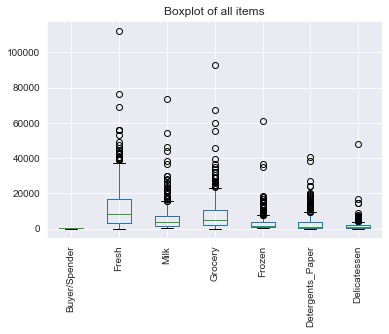

In [106]:
whole.plot(kind='box')
plt.xticks(rotation=90)
plt.title('Boxplot of all items')

In [107]:
#all data contains outliers.

## Q1.5

As per the analysis, its evident that there are inconsistencies in spending of different items,by calculating Coefficient of Variation, which should be minimized. The spending of Hotel and Retail channel are different which should be more or less equal. Total spend should be equal for different regions as well. Need to focus on other items also than “Fresh” and “Grocery”

# Survey Dataset

In [108]:
cmsu = pd.read_csv(r'C:\Users\Ganesh Hari\Downloads\Survey-1.csv')
cmsu.head()

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
0,1,Female,20,Junior,Other,Yes,2.9,Full-Time,50.0,1,3,350,Laptop,200
1,2,Male,23,Senior,Management,Yes,3.6,Part-Time,25.0,1,4,360,Laptop,50
2,3,Male,21,Junior,Other,Yes,2.5,Part-Time,45.0,2,4,600,Laptop,200
3,4,Male,21,Junior,CIS,Yes,2.5,Full-Time,40.0,4,6,600,Laptop,250
4,5,Male,23,Senior,Other,Undecided,2.8,Unemployed,40.0,2,4,500,Laptop,100


In [109]:
cmsu.isnull().sum()

ID                   0
Gender               0
Age                  0
Class                0
Major                0
Grad Intention       0
GPA                  0
Employment           0
Salary               0
Social Networking    0
Satisfaction         0
Spending             0
Computer             0
Text Messages        0
dtype: int64

In [110]:
cmsu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 62 non-null     int64  
 1   Gender             62 non-null     object 
 2   Age                62 non-null     int64  
 3   Class              62 non-null     object 
 4   Major              62 non-null     object 
 5   Grad Intention     62 non-null     object 
 6   GPA                62 non-null     float64
 7   Employment         62 non-null     object 
 8   Salary             62 non-null     float64
 9   Social Networking  62 non-null     int64  
 10  Satisfaction       62 non-null     int64  
 11  Spending           62 non-null     int64  
 12  Computer           62 non-null     object 
 13  Text Messages      62 non-null     int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 6.9+ KB


In [111]:
pd.crosstab(cmsu['Gender'],cmsu['Major'])

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided
Gender,,,,,,,,
Female,3,3,7,4,4,3,9,0
Male,4,1,4,2,6,4,5,3


In [112]:
pd.crosstab(cmsu['Gender'],cmsu['Grad Intention'])

Grad Intention,No,Undecided,Yes
Gender,,,
Female,9,13,11
Male,3,9,17


In [113]:
pd.crosstab(cmsu['Gender'],cmsu['Employment'])

Employment,Full-Time,Part-Time,Unemployed
Gender,,,
Female,3,24,6
Male,7,19,3


In [114]:
pd.crosstab(cmsu['Gender'],cmsu['Computer'])

Computer,Desktop,Laptop,Tablet
Gender,,,
Female,2,29,2
Male,3,26,0


In [115]:
#2.2.1 and 2.2.2
cmsu['Gender'].value_counts()

Female    33
Male      29
Name: Gender, dtype: int64

In [116]:
print('Probability that a randomly selected candidate will be male:',round(29/len(cmsu['Gender']),2))
print('Probability that a randomly selected candidate will be female:',round(33/len(cmsu['Gender']),2))

Probability that a randomly selected candidate will be male: 0.47
Probability that a randomly selected candidate will be female: 0.53


In [117]:
pd.crosstab(cmsu['Gender'],cmsu['Major'])

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided
Gender,,,,,,,,
Female,3,3,7,4,4,3,9,0
Male,4,1,4,2,6,4,5,3


In [118]:
#2.3.1 and 2.3.2
print('Among MALE candidates:')
print('Probability of Accounting Major = ',round(4/29,2))
print('Probability of CIS Major = ',round(1/29,2))
print('Probability of Economics/Finance Major = ',round(4/29,2))
print('Probability of International Business Major = ',round(2/29,2))
print('Probability of Management Major = ',round(6/29,2))
print('Probability of Retailing/Marketing Major = ',round(5/29,2))
print('Probability of Other majors = ', round(4/29,2))
print('Probability of Undecided = ', round(3/29,2))
print('---------------------------------------------------')
print('Among FEMALE candidates:')
print('Probability of Accounting Major = ',round(3/33,2))
print('Probability of CIS Major = ',round(3/33,2))
print('Probability of Economics/Finance Major = ',round(7/33,2))
print('Probability of International Business Major = ',round(4/33,2))
print('Probability of Management Major = ',round(4/33,2))
print('Probability of Retailing/Marketing Major = ',round(9/33,2))
print('Probability of Other majors = ', round(9/33,2))
print('Probability of Undecided = ', 0/33)


Among MALE candidates:
Probability of Accounting Major =  0.14
Probability of CIS Major =  0.03
Probability of Economics/Finance Major =  0.14
Probability of International Business Major =  0.07
Probability of Management Major =  0.21
Probability of Retailing/Marketing Major =  0.17
Probability of Other majors =  0.14
Probability of Undecided =  0.1
---------------------------------------------------
Among FEMALE candidates:
Probability of Accounting Major =  0.09
Probability of CIS Major =  0.09
Probability of Economics/Finance Major =  0.21
Probability of International Business Major =  0.12
Probability of Management Major =  0.12
Probability of Retailing/Marketing Major =  0.27
Probability of Other majors =  0.27
Probability of Undecided =  0.0


In [119]:
#2.4.1

print('P(intends to graduate n Male) = P(inten | Male)* P(Male) =', round((17/29)*(29/62),2))
round(9/62 *100,2)

P(intends to graduate n Male) = P(inten | Male)* P(Male) = 0.27


14.52

In [120]:
#2.4.2

print('P(no Laptop n Female) = P(no laptop | female)* P(female) =', round((4/33)*(33/62),2))

P(no Laptop n Female) = P(no laptop | female)* P(female) = 0.06


In [121]:
#2.5.1
p_fulltime = 10/62
p_male_fulltime = ((7/29)*(29/62))
print('P(male or full time employment) = P(male) + P(full time emp) - P(male n fulltimeemp) = ',round(p_fulltime + (29/62)-  7/62,2))


P(male or full time employment) = P(male) + P(full time emp) - P(male n fulltimeemp) =  0.52


In [122]:
#2.5.2

print('P(female |international/management) =  ',round((8/33),2))

P(female |international/management) =   0.24


In [123]:
#2.6

df1 = cmsu[cmsu['Grad Intention']!= 'Undecided']
pd.crosstab(df1['Gender'],df1['Grad Intention'])

Grad Intention,No,Yes
Gender,,
Female,9,11
Male,3,17


In [124]:
print('For 2 events to be independent, following condition is to be satified:')
print('P(A ∩ B) = P(A) * P(B)')
p_f = 20/40
print('P(Female) = ', p_f)
p_grad = 28/40
print('P(Grad Intent yes)=' ,p_grad)
p_f_n_grad = 11/20
print('P(Female n Grad Intent yes) = ',p_f_n_grad)
print('P(Female) * P(Grad Intent yes) =', p_f*p_grad)

print('The probabilities are not equal.Thus the graduate intention and being female are not independent events')

For 2 events to be independent, following condition is to be satified:
P(A ∩ B) = P(A) * P(B)
P(Female) =  0.5
P(Grad Intent yes)= 0.7
P(Female n Grad Intent yes) =  0.55
P(Female) * P(Grad Intent yes) = 0.35
The probabilities are not equal.Thus the graduate intention and being female are not independent events


In [125]:
#2.7.1
(cmsu['GPA']<3).value_counts()

False    45
True     17
Name: GPA, dtype: int64

In [126]:
print('P(student with GPA <3) =', round(17/62,2))

P(student with GPA <3) = 0.27


In [127]:
#2.7.2
pd.crosstab(cmsu['Gender'],cmsu['Salary']>50)

Salary,False,True
Gender,,
Female,20,13
Male,19,10


In [128]:
print('P(M |salary>50)= P(M n salary>50)/P(salary>50)=', round((10/29)*(29/62),2))

P(M |salary>50)= P(M n salary>50)/P(salary>50)= 0.16


In [129]:
print('P(F|salary>50)= ',round((13/33)*(33/62),2))

P(F|salary>50)=  0.21


In [130]:
columns_list =['GPA','Salary','Spending','Text Messages']


C:\Users\Ganesh Hari\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Ganesh Hari\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Ganesh Hari\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `hist

<Figure size 1080x864 with 0 Axes>

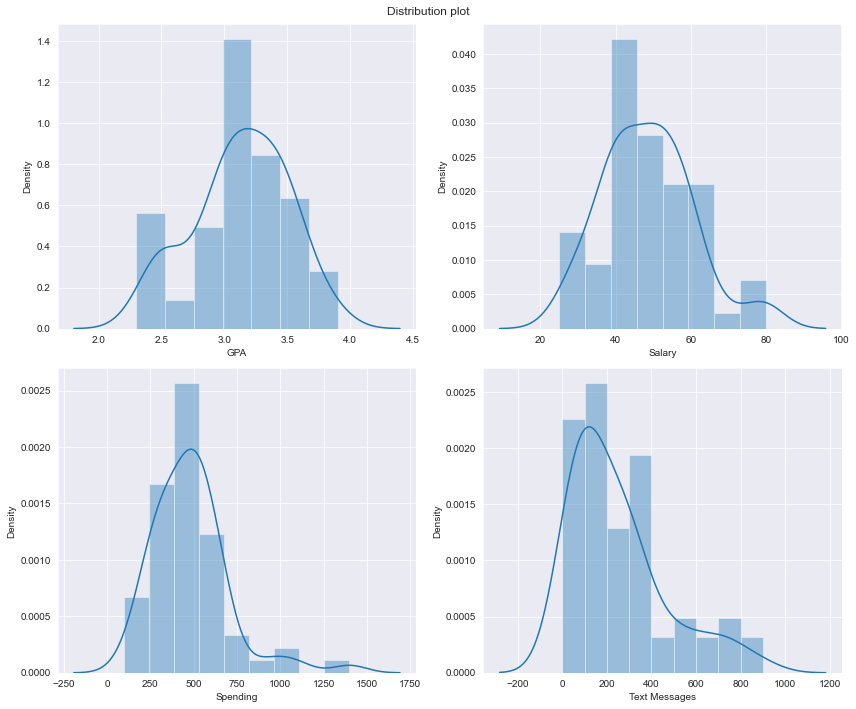

In [131]:
plt.figure(figsize=(15,12))
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2,figsize=(12,10))
fig.suptitle('Distribution plot')
sns.distplot(cmsu['GPA'],ax=ax1)
sns.distplot(cmsu['Salary'],ax=ax2)
sns.distplot(cmsu['Spending'],ax=ax3)
sns.distplot(cmsu['Text Messages'],ax=ax4)
plt.tight_layout()

In [132]:
cmsu[columns_list].describe()

,GPA,Salary,Spending,Text Messages
count,62.000000,62.000000,62.000000,62.000000
mean,3.129032,48.548387,482.016129,246.209677
std,0.377388,12.080912,221.953805,214.465950
min,2.300000,25.000000,100.000000,0.000000
25%,2.900000,40.000000,312.500000,100.000000
50%,3.150000,50.000000,500.000000,200.000000
75%,3.400000,55.000000,600.000000,300.000000
max,3.900000,80.000000,1400.000000,900.000000


In [133]:
from scipy.stats import skew
for i in columns_list:
    print( i , round(skew(cmsu[i]),2))

GPA -0.31
Salary 0.52
Spending 1.55
Text Messages 1.26


By these details we confirm that out of the given four data sets ‘GPA’ and ‘Salary’ are following normal distribution whereas other two ‘Spending’ and ‘Text Messages’ are not following the normal distribution

# Problem 3

In [137]:
from scipy.stats import ttest_1samp , ttest_ind

In [138]:
shingles = pd.read_csv(r'C:\Users\Ganesh Hari\Downloads\A+&+B+shingles.csv')
shingles.head()

,A,B
0,0.44,0.14
1,0.61,0.15
2,0.47,0.31
3,0.30,0.16
4,0.15,0.37


In [139]:
shingles.shape

(36, 2)

In [140]:
shingles.isnull().sum()

A    0
B    5
dtype: int64

### For the A shingles,the null and alternative hypothesis to test whether the population mean moisture content is lessthan 0.35 pound per 100 squarefeet is given:
H0 : mean moisture content <=0.35

HA : mean moisture content > 0.35

In [141]:
t_stat,p_val = ttest_1samp(shingles.A,0.35)
print('t_statistic:',round(t_stat,2))
print('p_value:', round(p_val/2,2))

t_statistic: -1.47
p_value: 0.07


In [142]:
p_val/2 >0.05

True

Since pvalue > 0.05, fail to reject H0 . There is not enough evidence to conclude that the mean moisture content for Sample A shingles is less than 0.35 pounds per 100 square feet.

### For the B shingles,the null and alternative hypothesis to test whether the population mean moisture content is lessthan 0.35 pound per 100 squarefeet is given:
H0 : mean moisture content <=0.35

HA : mean moisture content > 0.35

In [143]:
t_stat,p_val = ttest_1samp(shingles.B,0.35,nan_policy='omit')
t_stat,p_val/2

(-3.1003313069986995, 0.0020904774003191826)

In [144]:
p_val/2 >0.05

False

Since pvalue < 0.05, reject H0 . There is enough evidence to conclude that the mean moisture content for Sample B shingles is not less than 0.35 pounds per 100 square feet.

In [145]:
#3.2

## Hypotheses Formulation:
H0 : μ(A)= μ(B)  

Ha : μ(A)!= μ(B)  

α = 0.05  

In [146]:
t_stats,p_val=ttest_ind(shingles['A'],shingles['B'],equal_var=True ,nan_policy='omit')
print('t_statistic:',round(t_stats,2))
print('p_value:', round(p_val,3))

t_statistic: 1.29
p_value: 0.202


In [147]:
p_val>0.05

True

 As the pvalue > α , fail to reject H0; and we can say that population mean for shingles A and B are equal.
### Test Assumptions 

When running a two-sample t-test, the basic assumptions are that the distributions of the two populations are normal, and that the variances of the two distributions are the same.

If those assumptions are not likely to be met, another testing procedure could be used.